In [1]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.9 MB/s eta 0:00:00


In [2]:
# uncomment to check the folder structure
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames[:10]:
#        print(os.path.join(dirname, filename))


In [3]:
from pathlib import Path 

# directories & files
DIR_DATA = Path("/kaggle/input/oxml-2023-ml-cases-esg-document-classifier/data/")
REPORTS_DIR = "reports/"
LABELS_FILE = "labels.csv"

# columns 
C_ID, C_CLASS = "id", "class"

In [4]:
import fitz
import pandas as pd 
from PIL import Image


def create_filepath(filename):
    return DIR_DATA / REPORTS_DIR / filename

def read_page(filename, page_number):
    filepath = create_filepath(filename)
    doc = fitz.open(filepath)
    page_index = page_number - 1
    page = doc.load_page(page_index) 
    return page.get_text()


def visualize_pdf_image(filename, page_number):
    doc = fitz.open(create_filepath(filename))
    page_index = page_number - 1
    pix = doc[page_index].get_pixmap()
    img_page = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img_page 

def get_labels():
    return pd.read_csv(DIR_DATA / LABELS_FILE)

def build_doc_id(filename, page_number): 
    return filename + "." + str(page_number)


class: environmental


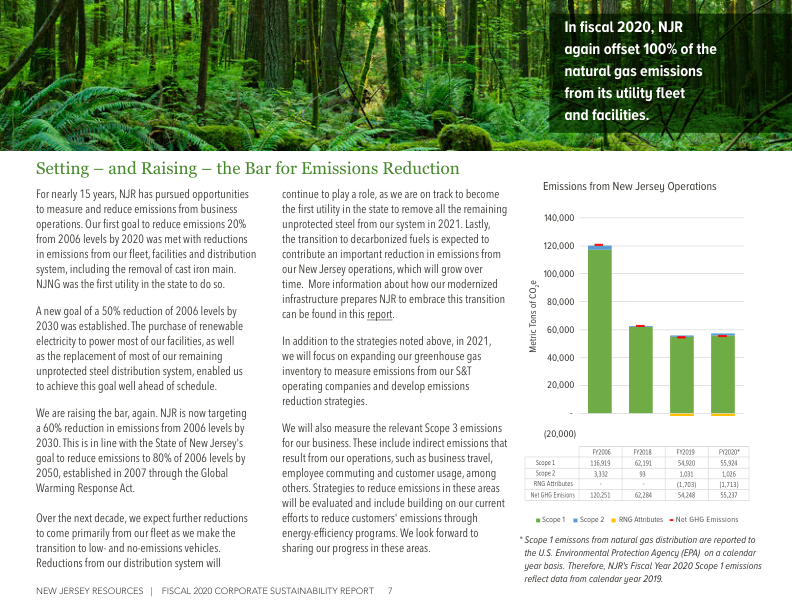

In [5]:
# visualize a page and it's class 

filename = "report_1132.pdf"
page_number = 9

labels = get_labels()
doc_id = build_doc_id(filename, page_number)
label = labels.loc[labels[C_ID] == doc_id, C_CLASS].values[0]
print(f"{C_CLASS}: {label}")
visualize_pdf_image(filename, page_number)

In [6]:
# inspect the page text 
print(read_page(filename, page_number))

For nearly 15 years, NJR has pursued opportunities  
to measure and reduce emissions from business  
operations. Our first goal to reduce emissions 20% 
from 2006 levels by 2020 was met with reductions  
in emissions from our fleet, facilities and distribution 
system, including the removal of cast iron main.  
NJNG was the first utility in the state to do so. 
A new goal of a 50% reduction of 2006 levels by  
2030 was established. The purchase of renewable 
electricity to power most of our facilities, as well  
as the replacement of most of our remaining   
unprotected steel distribution system, enabled us  
 to achieve this goal well ahead of schedule.
We are raising the bar, again. NJR is now targeting 
a 60% reduction in emissions from 2006 levels by 
2030. This is in line with the State of New Jersey's  
goal to reduce emissions to 80% of 2006 levels by 
2050, established in 2007 through the Global  
Warming Response Act. 
Over the next decade, we expect further reductions  
to co